# Modelo SVM

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# se importa el dataset
df = pd.read_csv('dataset.csv')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
# se elimina la fila de nombres
df = df.drop(0)
# definimos el índice
df.set_index('ID', inplace=True)
# se convierte los datos a numéricos
for c in df:
    df[c] = df[c].astype('float64')

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
# se muestra información del dataset
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Se agregan nuevas variables

#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


In [9]:
# Separamos las columnas
X = df.drop('Y', axis=1)
y = df['Y']

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

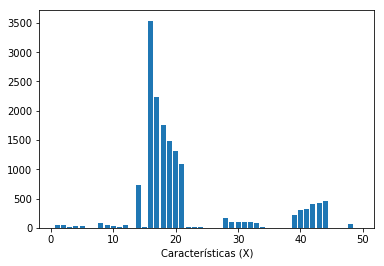

In [10]:
# Realizamos las operaciones propuestas por https://github.com/kaankarakeben/UCI_Credit_Card-SVM-Classifier

# Convirtiendo variables categoricas 'sex' (X2), 'marriage' (X4) y 'education' (X3) a one-hot
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['X2']])
marriage = OHE.fit_transform(X[['X4']])
education = OHE.fit_transform(X[['X3']])

cat_variables = np.hstack((sex, marriage, education))
#print(cat_variables[0])

cat_var_names = ['X2','X4','X3']
num_variables = X.drop(cat_var_names, axis=1)

# Escalando variables numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

# Se junta las variables numericas con categoricas
final_X = np.hstack((cat_variables,stdz_num_variables))

# Se seleccionan las 10 mejores caracteristicas
from sklearn.feature_selection import SelectKBest

test = SelectKBest(k=10)
fit = test.fit(final_X,y)
np.set_printoptions(precision=1)
#print(fit.scores_)
# Mostramos las variables por importancia
plt.xlabel("Características (X)")
plt.bar(np.arange(1,50),fit.scores_)
plt.show()

# filtramos los datos con las 10 mejores
features = fit.transform(final_X)

#features.shape

In [11]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(features, y, test_size=3000, random_state=77)

In [12]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape

((27000, 10),
 (24000, 10),
 (3000, 10),
 (3000, 10),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

In [13]:
!pip install imblearn

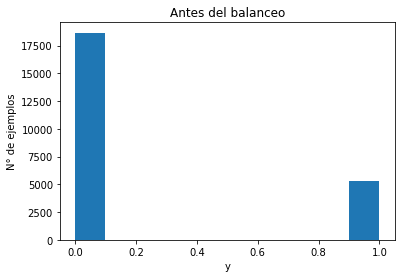

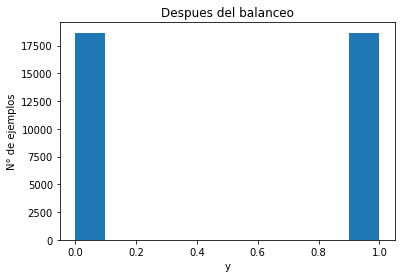

In [14]:
# Corrigiendo desbalanceo con SMOTE

plt.title('Antes del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entren)
plt.show()

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_entren_os, y_entren_os = smote.fit_sample(X_entren, y_entren)

plt.title('Despues del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entren_os)
plt.show()

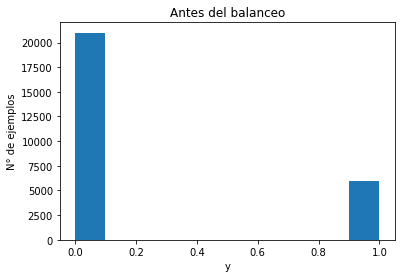

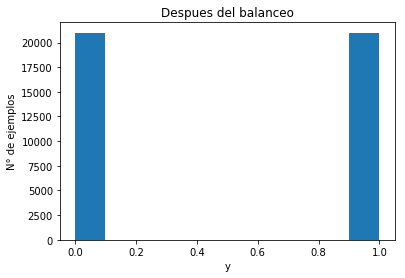

In [15]:
# Balanceo para test

plt.title('Antes del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entrenval)
plt.show()

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_entrenval_os, y_entrenval_os = smote.fit_sample(X_entrenval, y_entrenval)

plt.title('Despues del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entrenval_os)
plt.show()

## Entrenamiento sin balanceo

In [26]:
from sklearn.svm import SVC
#from sklearn.calibration import CalibratedClassifierCV

# Usamos SVC de sklearn solo ajustando probability para imprimir la curva de probaibilidades
svcModel = SVC(probability=True)
svcModel.fit(X_entren,y_entren)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
!pip install import-ipynb

In [27]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)

In [28]:
#from ipynb.fs.full.costo import custom_cost

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(svcModel, X_entren, y_entren)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(svcModel, X_val, y_val)
print()

#from ipynb.fs.full.prob import mostrarPQ

# mostrar probabilidades empiricales vs predicción
#print('Probabilidad de no pagar:')
#print('-------------------------')
#y_val_prob = svcModel.predict_proba(X_val)[:,1] # Probability of category +1
#mostrarPQ(y_val, y_val_prob)

Costo de Entrenamiento:
-----------------------
Exactitud:     0.8243333333333334
Precisión:     0.6951685783802573
Exhaustividad: 0.3746019853905226
AUC:           0.6638027878830862
Costo por cliente: 0.6488333333333334

Costo de Validación:
--------------------
Exactitud:     0.815
Precisión:     0.6676557863501483
Exhaustividad: 0.33682634730538924
AUC:           0.6443994515257649
Costo por cliente: 0.7006666666666667



In [23]:
!pip install tabulate

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\ricardo\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


In [24]:
import sys
from tabulate import tabulate

def imprimirCalidad(calidad):
    print(tabulate([['Exactitud:', calidad.accuracy],
                    ['Precisión:', calidad.precision],
                    ['Exhaustividad:', calidad.recall],
                    ['AUC:', calidad.AUC],
                    ['Costo por cliente:', calidad.cost]]))

def buscarSvcKernel(X_entren, y_entren, X_val, y_val, printdetail=False):       
    # busqueda del mejor kernel
    kernels = ['linear','poly','rbf','sigmoid']

    mejor_modelo = None
    #mejor_score = 0
    mejor_costo = sys.float_info.max
    mejor_kernel = None
    mejor_train_cost = None
    mejor_valid_cost = None

    for kernel in kernels:
        model = SVC(kernel=kernel,probability=True)
        model.fit(X_entren, y_entren)

        if printdetail:
            print(tabulate([['Kernel:',kernel]]))
            print()
            print("Costo de entrenamiento:")
            print("-----------------------")
            trainCost = custom_cost(model, X_entren, y_entren, True)
            print()
            print("Costo de validación:")
            print("--------------------")
            validCost = custom_cost(model, X_val, y_val, True)
            print()
        else:
            trainCost = custom_cost(model, X_entren, y_entren, False)
            validCost = custom_cost(model, X_val, y_val, False)

        if validCost.cost < mejor_costo:
            mejor_costo = validCost.cost
            mejor_kernel = kernel
            mejor_modelo = model
            mejor_train_cost = trainCost
            mejor_valid_cost = validCost

    print('*** Mejor resultado ***')
    print()
    print(tabulate([['Kernel:',mejor_kernel]]))
    print()
    print("Costo de entrenamiento:")
    imprimirCalidad(mejor_train_cost)
    print()
    print("Costo de validación:")
    imprimirCalidad(mejor_valid_cost)
    print()
    
    print('Probabilidad de no pagar:')
    print('-------------------------')
    y_val_prob = mejor_modelo.predict_proba(X_val)[:,1] # Using probability of category +1
    #mostrarPQ(y_val, y_val_prob)

In [25]:
buscarSvcKernel(X_entren, y_entren, X_val, y_val, printdetail=True)

-------  ------
Kernel:  linear
-------  ------

Costo de entrenamiento:
-----------------------
Exactitud:     0.8098333333333333
Precisión:     0.708445400753093
Exhaustividad: 0.24667540737965912
AUC:           0.6088154380020315
Costo por cliente: 0.805625

Costo de validación:
--------------------
Exactitud:     0.8036666666666666
Precisión:     0.670995670995671
Exhaustividad: 0.23203592814371257
AUC:           0.5997229383428683
Costo por cliente: 0.8286666666666667



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-------  ----
Kernel:  poly
-------  ----

Costo de entrenamiento:
-----------------------
Exactitud:     0.8054166666666667
Precisión:     0.7199211045364892
Exhaustividad: 0.2050945870013111
AUC:           0.5911331141962238
Costo por cliente: 0.8562916666666667

Costo de validación:
--------------------
Exactitud:     0.8026666666666666
Precisión:     0.69
Exhaustividad: 0.20658682634730538
AUC:           0.5900001027105309
Costo por cliente: 0.858



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-------  ---
Kernel:  rbf
-------  ---

Costo de entrenamiento:
-----------------------
Exactitud:     0.8243333333333334
Precisión:     0.6951685783802573
Exhaustividad: 0.3746019853905226
AUC:           0.6638027878830862
Costo por cliente: 0.6488333333333334

Costo de validación:
--------------------
Exactitud:     0.815
Precisión:     0.6676557863501483
Exhaustividad: 0.33682634730538924
AUC:           0.6443994515257649
Costo por cliente: 0.7006666666666667



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-------  -------
Kernel:  sigmoid
-------  -------

Costo de entrenamiento:
-----------------------
Exactitud:     0.69025
Precisión:     0.3006660323501427
Exhaustividad: 0.2959355684585128
AUC:           0.5495003923424335
Costo por cliente: 0.8704166666666666

Costo de validación:
--------------------
Exactitud:     0.6886666666666666
Precisión:     0.2902208201892745
Exhaustividad: 0.2754491017964072
AUC:           0.5412408459239326
Costo por cliente: 0.8953333333333333

*** Mejor resultado ***

-------  ---
Kernel:  rbf
-------  ---

Costo de entrenamiento:
------------------  --------
Exactitud:          0.824333
Precisión:          0.695169
Exhaustividad:      0.374602
AUC:                0.663803
Costo por cliente:  0.648833
------------------  --------

Costo de validación:
------------------  --------
Exactitud:          0.815
Precisión:          0.667656
Exhaustividad:      0.336826
AUC:                0.644399
Costo por cliente:  0.700667
------------------  --------

Prob

NameError: name 'mostrarPQ' is not defined

## Entrenamiento con oversampling

In [218]:
osModel = SVC(probability=True)
osModel.fit(X_entren_os,y_entren_os)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
!pip install --upgrade scipy

Requirement already up-to-date: scipy in /home/alain/anaconda3/lib/python3.7/site-packages (1.3.0)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.7167656341946184
Precisión:     0.7821727019498608
Exhaustividad: 0.6008666345690901
AUC:           0.7167656341946183
Costo por cliente: 0.7810677793826566

Costo de Validación:
--------------------
Exactitud:     0.7723333333333333
Precisión:     0.5106918238993711
Exhaustividad: 0.58
AUC:           0.7054347826086957
Costo por cliente: 0.48433333333333334

Probabilidad de no pagar:
-------------------------


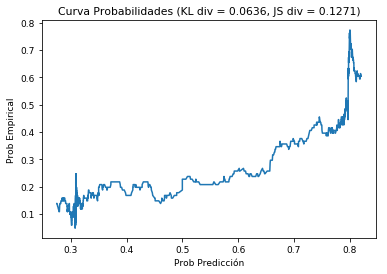

In [219]:
# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(osModel, X_entren_os, y_entren_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(osModel, X_val, y_val)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_val_prob = osModel.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

-------  ------
Kernel:  linear
-------  ------

Costo de entrenamiento:
-----------------------
Exactitud:     0.6851762691916761
Precisión:     0.7813541412663578
Exhaustividad: 0.5142566736211416
AUC:           0.685176269191676
Costo por cliente: 1.02918204675547

Costo de validación:
--------------------
Exactitud:     0.7813333333333333
Precisión:     0.5340557275541795
Exhaustividad: 0.4928571428571429
AUC:           0.6809937888198758
Costo por cliente: 0.577

-------  ----
Kernel:  poly
-------  ----

Costo de entrenamiento:
-----------------------
Exactitud:     0.707591076873696
Precisión:     0.7831861636138072
Exhaustividad: 0.5741186540416199
AUC:           0.707591076873696
Costo por cliente: 0.8571122880222544

Costo de validación:
--------------------
Exactitud:     0.7706666666666667
Precisión:     0.5079155672823219
Exhaustividad: 0.55
AUC:           0.6939130434782609
Costo por cliente: 0.521

-------  ---
Kernel:  rbf
-------  ---

Costo de entrenamiento:
---------

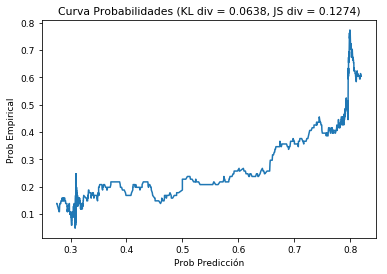

In [220]:
# busqueda del mejor kernel con oversampling
buscarSvcKernel(X_entren_os, y_entren_os, X_val, y_val, printdetail=True)

## Test

Costo de Entrenamiento:
-----------------------
Exactitud:     0.7157623969894726
Precisión:     0.7817028422165557
Exhaustividad: 0.5987233839851379
AUC:           0.7157623969894727
Costo por cliente: 0.7874291430476825

Costo de Validación:
--------------------
Exactitud:     0.7813333333333333
Precisión:     0.4814305364511692
Exhaustividad: 0.5564387917329093
AUC:           0.698717076170124
Costo por cliente: 0.474

Probabilidad de no pagar:
-------------------------


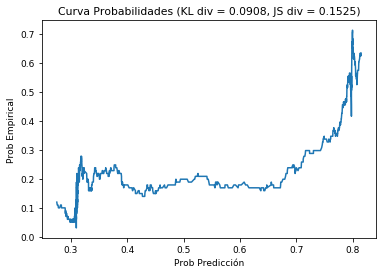

In [221]:
testModel = SVC(kernel='rbf',probability=True)
testModel.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModel, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModel, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModel.predict_proba(X_test)[:,1] # Probability of category +1
mostrarPQ(y_test, y_test_prob)

Pruebas con Kernel Polinomial y Grados: 2, 3, 4, 5, 6

In [ ]:
#nueva medida

print("DEGREE 2")
print("________")
#kernel Poly
testModelPoly = SVC(kernel='poly',probability=True,degree = 2)
testModelPoly.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModelPoly, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModelPoly, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModelPoly.predict_proba(X_test)[:,1] # Probability of category +1
#mostrarPQ(y_test, y_test_prob)



print("DEGREE 3")
print("________")
#kernel Poly
testModelPoly = SVC(kernel='poly',probability=True,degree = 3)
testModelPoly.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModelPoly, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModelPoly, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModelPoly.predict_proba(X_test)[:,1] # Probability of category +1
#mostrarPQ(y_test, y_test_prob)



print("DEGREE 4")
print("________")
#kernel Poly
testModelPoly = SVC(kernel='poly',probability=True,degree = 4)
testModelPoly.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModelPoly, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModelPoly, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModelPoly.predict_proba(X_test)[:,1] # Probability of category +1
#mostrarPQ(y_test, y_test_prob)



print("DEGREE 5")
print("________")
#kernel Poly
testModelPoly = SVC(kernel='poly',probability=True,degree = 5)
testModelPoly.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModelPoly, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModelPoly, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModelPoly.predict_proba(X_test)[:,1] # Probability of category +1
#mostrarPQ(y_test, y_test_prob)

print("DEGREE 6")
print("________")
#kernel Poly
testModelPoly = SVC(kernel='poly',probability=True,degree = 6)
testModelPoly.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModelPoly, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------') 
custom_cost(testModelPoly, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModelPoly.predict_proba(X_test)[:,1] # Probability of category +1
#mostrarPQ(y_test, y_test_prob)



#nota. GRADO 6.... demanda demasiado tiempo de ejecución.


DEGREE 2
________


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.6776544562473206
Precisión:     0.70167090250365
Exhaustividad: 0.6181107988377078
AUC:           0.6776544562473205
Costo por cliente: 0.77706854665841

Costo de Validación:
--------------------
Exactitud:     0.7003333333333334
Precisión:     0.36764705882352944
Exhaustividad: 0.5961844197138315
AUC:           0.6620736522862705
Costo por cliente: 0.5133333333333333

Probabilidad de no pagar:
-------------------------
DEGREE 3
________


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.7070452055447054
Precisión:     0.7772886762360447
Exhaustividad: 0.5803839375029772
AUC:           0.7070452055447055
Costo por cliente: 0.8419949506978517

Costo de Validación:
--------------------
Exactitud:     0.778
Precisión:     0.47412587412587415
Exhaustividad: 0.5389507154213037
AUC:           0.6901839194989269
Costo por cliente: 0.49566666666666664

Probabilidad de no pagar:
-------------------------
DEGREE 4
________


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.7108798170818844
Precisión:     0.7950546520927753
Exhaustividad: 0.5682370313914162
AUC:           0.7108798170818845
Costo por cliente: 0.8685276044395751

Costo de Validación:
--------------------
Exactitud:     0.7876666666666666
Precisión:     0.4939209726443769
Exhaustividad: 0.5166931637519873
AUC:           0.6881230475023117
Costo por cliente: 0.5093333333333333

Probabilidad de no pagar:
-------------------------
DEGREE 5
________


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.7180488734340018
Precisión:     0.8126921237789466
Exhaustividad: 0.56671271376173
AUC:           0.7180488734340019
Costo por cliente: 0.865169342161673

Costo de Validación:
--------------------
Exactitud:     0.7943333333333333
Precisión:     0.509493670886076
Exhaustividad: 0.5119236883942766
AUC:           0.6905885839693863
Costo por cliente: 0.5076666666666667

Probabilidad de no pagar:
-------------------------
DEGREE 6
________


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
